# Занятие 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Можно задать своё дискретное распределение
Для этого нужно задать множество значений и соответсвующих вероятностей

In [2]:
elements = np.array([1,5,12])
probabilities = [0.2, 0.45, 0.35]

np.random.choice(elements, 10, p=probabilities)

array([ 1, 12,  5,  5,  5, 12,  5, 12, 12,  1])

In [3]:
a = {"sing":"plus"}
elements = ["a", (2,4), a]
probabilities = [0.2, 0.45, 0.35]

np.random.choice(elements, 10, p=probabilities)

<ipython-input-3-aa0d2a847771>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.random.choice(elements, 10, p=probabilities)


array(['a', 'a', {'sing': 'plus'}, {'sing': 'plus'}, {'sing': 'plus'},
       (2, 4), (2, 4), (2, 4), (2, 4), {'sing': 'plus'}], dtype=object)

## Дискретные случайные величины

### Распределение Бернулли

In [4]:
bernoulli_rv = sts.bernoulli(0.7) # задаётся один параметр -- вероятность успеха

bernoulli_rv.rvs(10)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

[]

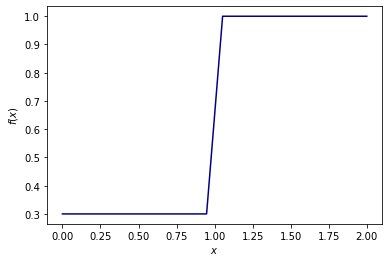

In [5]:
x = np.linspace(0,2,20)
cdf = bernoulli_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Функция вероятности pmf для дискретных случайных величин 

[]

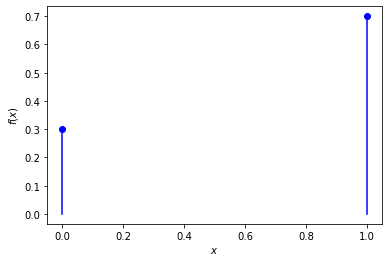

In [6]:
x = np.linspace(0,1,2)
pmf = bernoulli_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pmf, color="blue" )
plt.plot((0,0), (0,bernoulli_rv.pmf(0)), color="blue")
plt.plot((1,1), (0,bernoulli_rv.pmf(1)), color="blue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

### Биномиальное распределение
Кол-во успехов в серии n независимых испытаний бернулли

In [7]:
binomial_rv = sts.binom(20, 0.4) # 20 испытаний с вероятностью успеха 0.4

binomial_rv.rvs(10)

array([ 7,  7,  6,  7,  8,  7,  5,  8,  7, 10])

[]

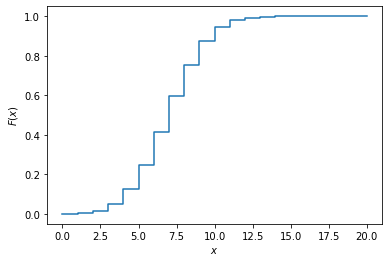

In [8]:
# построим функцию распределения
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x) # вернёт массив из значений функции распределения
plt.step(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

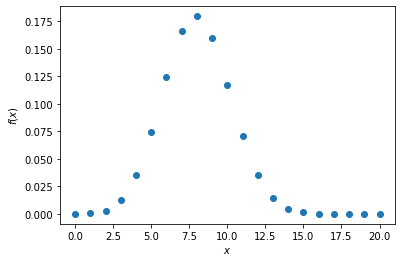

In [9]:
x = np.linspace(0,20,21)
pdf = binomial_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Посмотрим как ведут себя биномиально распределенные величины при разных значениях параметров

[]

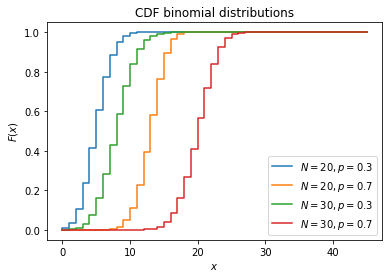

In [10]:
x = np.linspace(0,45,46)
for N in [20,30]:
    for p in [0.3, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))

plt.legend()
plt.title("CDF binomial distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

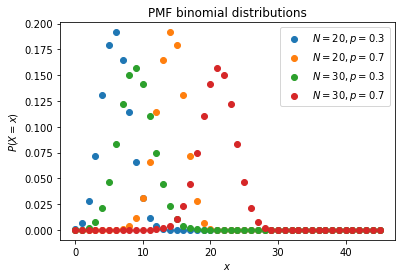

In [11]:
x = np.linspace(0,45,46)
for N in [20,30]:
    for p in [0.3, 0.7]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.scatter(x, pmf, label="$N=%s, p=%s$" % (N,p))

plt.legend()
plt.title("PMF binomial distributions")
plt.ylabel("$P(X=x)$")
plt.xlabel("$x$")
plt.plot()

### Распределение Пуассона

In [12]:
poisson_rv = sts.poisson(5.1) # интенсивность 5
poisson_rv.rvs(10)

array([4, 1, 4, 3, 3, 9, 7, 3, 5, 9])

[]

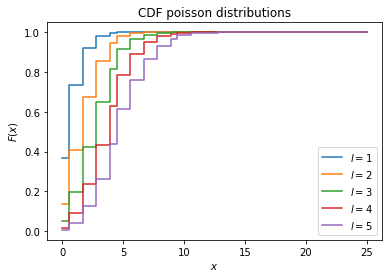

In [13]:
x = np.linspace(0,25,46)
for l in [1,2,3,4,5]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$l=%s$" % l)

plt.legend()
plt.title("CDF poisson distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

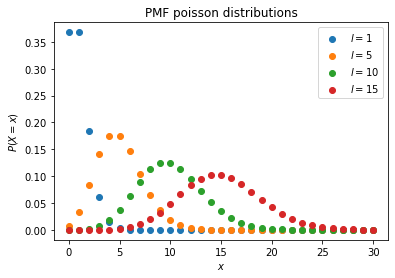

In [14]:
x = np.linspace(0,30,31)
for l in [1,5,10,15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.scatter(x, pmf, label="$l=%s$" % l)

plt.legend()
plt.title("PMF poisson distributions")
plt.ylabel("$P(X=x)$")
plt.xlabel("$x$")
plt.plot()

## Непрерывные случайные величины

### Нормальное распределение

In [15]:
mu = 1
sigma = 4

norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерировать 10 значений 
norm_rv.rvs(size=10)

array([ 8.18730336, -1.8477254 ,  3.84154751, -0.90190336, -1.80183006,
       -2.27868097, -0.49026054,  6.56160782, -4.45398038,  4.96219425])

In [16]:
# loc задаёт сдвиг (мат ожидание), scale - масштаб (среднеквадратичное отклонение), size - размер выборки

In [17]:
# вернём значение функции распределения нормальной случайной величины в точке
norm_rv.cdf(2) # вероятность того, что случайная величина будет меньше либо равна переданного значения

0.5987063256829237

[]

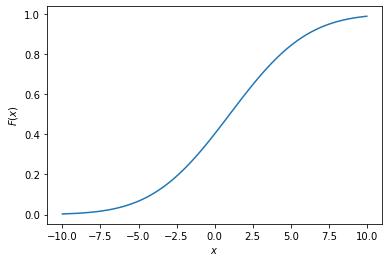

In [18]:
# построим график функции распределения
x = np.linspace(-10,10,100)
cdf = norm_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

In [19]:
# возьмём теперь значение функции плотности вероятности в точке
norm_rv.pdf(2)

0.09666702920071232

[]

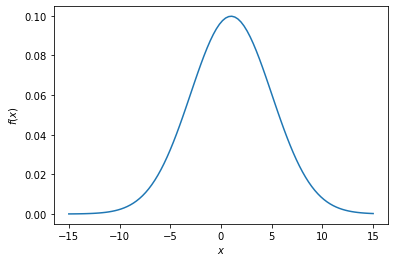

In [20]:
# построим плотность вероятности
x = np.linspace(-15,15,100)
pdf = norm_rv.pdf(x) # вернёт массив из значений функции распределения
plt.plot(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

### Равномерное распределение на отрезке

In [21]:
a = 1
b = 4

uniform_rv = sts.uniform(a, b-a) # левая граница, и размер отрезка

uniform_rv.rvs(10)

array([2.17987761, 1.97965795, 3.76865   , 2.27193519, 1.14289752,
       2.77697369, 1.493677  , 2.31111928, 1.08720594, 3.38919283])

[]

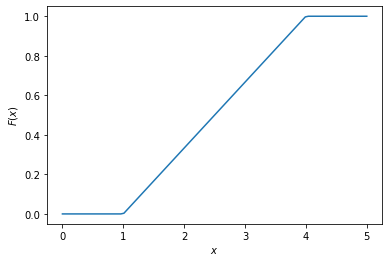

In [22]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

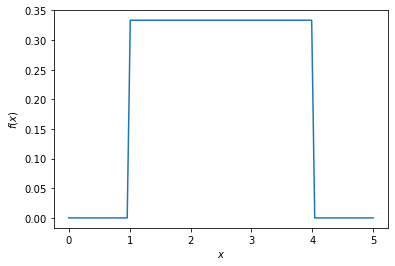

In [23]:
x = np.linspace(0,5,100)
pdf = uniform_rv.pdf(x) # вернёт массив из значений функции распределения
plt.plot(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

## список доступных распределений https://docs.scipy.org/doc/scipy/reference/stats.html